# Рабочая тетрадь 5

#### Пример 1.2.1
***Задача***: Необходимо разработать виртуальную модель процесса обучения. В программе должны быть объекты-ученики, учитель, кладезь знаний.

Потребуется три класса – "учитель", "ученик", "данные". Учитель и ученик во многом похожи, оба – люди. Значит, их классы могут принадлежать одному надклассу "человек". Однако в контексте данной задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим, что должны уметь объекты для решения задачи "увеличить знания":

-	Ученик должен уметь брать информацию и превращать ее в свои знания.
-	Учитель должен уметь учить группу учеников.
-	Данные могут представлять собой список знаний. Элементы будут извлекаться по индексу.


In [1]:
class Data:
    def __init__(self, *info):
        self.info = list(info)

    def __getitem__(self, i):
        return self.info[i]


class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)


class Pupil:
    def __init__(self):
        self.knowledge = []

    def take(self, info):
        self.knowledge.append(info)


lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


#### Пример 1.2.2
***Задача:***
	Напишите программу по следующему описанию. Есть класс "Воин". От него создаются два экземпляра-юнита. Каждому устанавливается здоровье в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет, здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от одного удара. После каждого удара надо выводить сообщение, какой юнит атаковал, и сколько у противника осталось здоровья. Как только у кого-то заканчивается ресурс здоровья, программа завершается сообщением о том, кто одержал победу.


In [2]:
import random


class Warrior:
    def __init__(self, health):
        self.health = health

    def hit(self, target, target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = "Warrior1"
        if target1 == warrior2:
            target1 = "Warrior2"
        print(target1, " has attacked")
        print(target.health, " left")
        if target.health == 0:
            print(target1, " has won")


warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input("Enter 1 to attack. Enter 2 to stop program:"))

while q != 2:
    if q == 1:
        j = random.randint(1, 3)
        if j % 2 == 0:
            warrior1.hit(warrior2, warrior1)
            q = int(input("Enter 1 to let some warrior attack:"))
        else:
            warrior2.hit(warrior1, warrior2)
            q = int(input("Enter 1 to let some warrior attack:"))
    else:
        print("Wrong input")
        break

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


### 1.2.3 Пример
***Задача:***
Создайте класс по работе с дробями. В классе должна быть реализована следующая функциональность:
-	сложение дробей;
-	вычитание дробей;
-	умножение дробей;
-	деление дробей.

In [3]:
class Rational:
    @staticmethod
    def gcd(a, b):
        while b != 0:
            (a, b) = (b, a % b)
        return a

    @staticmethod
    def sgn(x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        else:
            return 0

    def __init__(self, n, d):
        if n == 0:
            self.num = 0
            self.den = 1
        else:
            z = self.sgn(n) * self.sgn(d)
            n = abs(n)
            d = abs(d)
            k = self.gcd(n, d)
            self.num = z * n // k
            self.den = d // k

    def __str__(self):
        if self.num == 0:
            return "0"
        else:
            return str(self.num) + "/" + str(self.den)

    def __add__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)

    def __radd__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)

    def __sub__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2 - n2 * d1
        d = d1 * d2
        return Rational(n, d)

    def __mul__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * n2
        d = d1 * d2
        return Rational(n, d)

    def __floordiv__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2
        d = d1 * n2
        return Rational(n, d)


d1 = Rational(1, 2)
d2 = Rational(1, 3)
d3 = d1 + d2
print(d3)
d4 = d1 - d2
print(d4)
d5 = d1 * d2
print(d5)
d6 = d1 * d2
print(d6)
d7 = d1 // d2
print(d7)
d8 = 6 + d1
print(d8)

5/6
1/6
1/6
1/6
3/2
13/2


#### Задание
Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [4]:
from math import factorial, asin, pi
from decimal import *


class Trigonometry:

    def convert(x):
        return x * pi / 180

    def sin(self, x):
        n = 50
        s = 0
        for i in range(n):
            # Ряд Тейлора для ф-ии синуса
            s1 = ((-1) ** (i) * x ** (2 * i + 1)) / factorial(2 * i + 1)
            s += s1
        return s

    def cos(self, x):
        n = 50
        s = 0
        for i in range(n):
            # Ряд Тейлора для ф-ии косинуса
            s1 = ((-1) ** (i) * x ** (2 * i)) / factorial(2 * i)
            s += s1
        return s

    def tg(self, x):
        return self.sin(x) / self.cos(x)

    def arctg(self, x):
        n = 100
        s = 0
        for i in range(n):
            s1 = ((-1) ** (i) * x ** (2 * i + 1)) / (2 * i + 1)
            s += s1
        return s

    def arcsin(self, x):
        return asin(x)

    def arccos(self, x):
        return pi / 2 - self.arcsin(x)


#### Пример 1.2.1
Определите класс бинарного дерева и задайте его объекты с отдельным атрибутом для каждого из потомков.

In [5]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right


t = Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

#### Пример 1.2.2
Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла).

Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.


In [6]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next


t = Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

#### Задание
Представьте дерево показанное на рисунке с использованием списка из списков. Выведите на печать корень дерева, а также его левое и правое поддеревья.
<img src="./data/tree.png">


In [7]:
tree = ['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
print(tree[0])
print(tree[1])
print(tree[2])

a
['b', ['d', [], []], ['e', [], []]]
['c', ['f', [], []], []]


#### Задание
Дан класс, описывающий бинарное дерево.
```
class Tree:
def __init__(self, data):
self.left = None
self.right = None
self.data = data
def PrintTree(self):
print(self.data)
```
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:
- Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
- Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
- Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.
- Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево). Перепишите, метод PrintTree для печати полной версии дерева.

In [8]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        if self.right:
            self.right.PrintTree()
        print(self.data)

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)


tree = Tree(27)
tree.insert(14)
tree.insert(35)
tree.insert(10)
tree.insert(19)
tree.insert(31)
tree.insert(42)
tree.PrintTree()

10
19
14
31
42
35
27


#### Пример 1.3.1
Построим дерево решений для задачи классификации, для этого, построим границу решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Импортируем библиотеки, набор данных и посмотрим его характеристики.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset("iris")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
dataset.shape

(150, 5)

In [11]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
17,5.1,3.5,1.4,0.3
19,5.1,3.8,1.5,0.3
109,7.2,3.6,6.1,2.5
134,6.1,2.6,5.6,1.4


In [14]:
y_train.head()

15        setosa
17        setosa
19        setosa
109    virginica
134    virginica
Name: species, dtype: object

После того, как данные были разделены на обучающие и тестовые наборы, последний шаг состоит в том, чтобы обучить алгоритм дерева решений на этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree , которая содержит встроенные классы/методы для различных алгоритмов дерева решений. Поскольку мы собираемся выполнить здесь задачу классификации, мы будем использовать класс DecisionTreeClassifier для этого примера. Метод fit этого класса вызывается для обучения алгоритма на обучающих данных, которые передаются в качестве параметра методу fit . Выполним следующий сценарий для обучения алгоритма.

[Text(0.4, 0.9, 'X[2] <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [40, 39, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.5\nsamples = 80\nvalue = [0, 39, 41]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 5.05\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.3, 'X[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

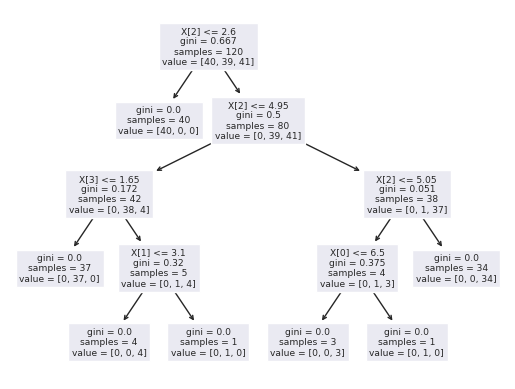

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
tree.plot_tree(classifier)

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica'], dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач классификации обычно используются такие метрики, как матрица путаницы, точность. Библиотека Scikit-Learn metrics содержит методы classification_report и confusion_matrix, которые могут быть использованы для расчета этих метрик.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.91      0.95        11
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых экземпляров наш алгоритм неправильно классифицировал только 1. Это приблизительно 97 % точности.


#### Задание
Постройте классификатор на основе дерева принятия решений следующего датасета:


In [18]:
X = np.array([[-1,-1], [-2,-1], [-3, -2], [1, 1], [2, 1], [3,2]])
target = np.array([0,0,0,1,1,1])

[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

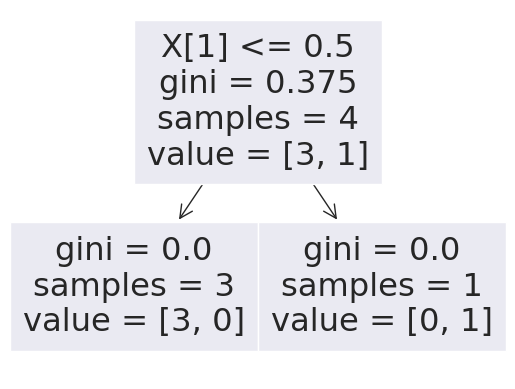

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
tree.plot_tree(classifier)

In [20]:
y_pred = classifier.predict(X_test)
print(*y_pred)
print(*y_test)

1 1
1 1


#### Пример 1.4.1
Постойте регрессию с использованием дерева решений, реализованного в Python.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r"https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


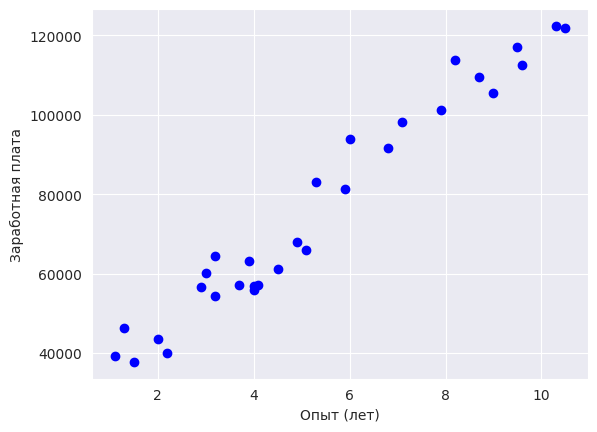

In [23]:
# Точечная диаграмма
plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='b', label="Заработная плата")
plt.xlabel("Опыт (лет)")
plt.ylabel("Заработная плата")
plt.show()

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


[Text(0.4956896551724138, 0.9375, 'X[0] <= 5.2\nsquared_error = 614737637.832\nsamples = 24\nvalue = 73886.208'),
 Text(0.20689655172413793, 0.8125, 'X[0] <= 2.55\nsquared_error = 81200345.857\nsamples = 14\nvalue = 54976.0'),
 Text(0.06896551724137931, 0.6875, 'X[0] <= 1.2\nsquared_error = 7820714.0\nsamples = 4\nvalue = 42241.0'),
 Text(0.034482758620689655, 0.5625, 'squared_error = 0.0\nsamples = 1\nvalue = 39343.0'),
 Text(0.10344827586206896, 0.5625, 'X[0] <= 2.1\nsquared_error = 6694994.667\nsamples = 3\nvalue = 43207.0'),
 Text(0.06896551724137931, 0.4375, 'X[0] <= 1.65\nsquared_error = 1795600.0\nsamples = 2\nvalue = 44865.0'),
 Text(0.034482758620689655, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = 46205.0'),
 Text(0.10344827586206896, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = 43525.0'),
 Text(0.13793103448275862, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 39891.0'),
 Text(0.3448275862068966, 0.6875, 'X[0] <= 4.7\nsquared_error = 19731272.6\nsamples = 10

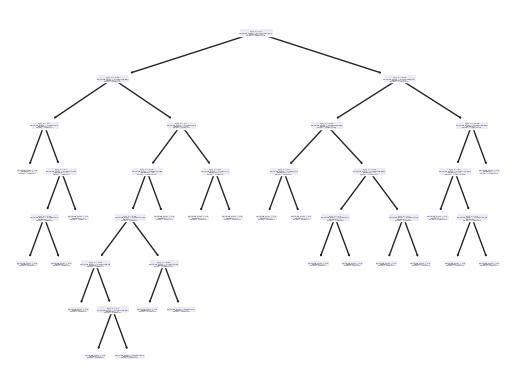

In [24]:
from sklearn.tree import DecisionTreeRegressor

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
tree.plot_tree(regressor)

In [25]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,37731.0,46205.0
1,122391.0,121872.0
2,57081.0,56375.5
3,63218.0,56375.5
4,116969.0,112635.0
5,109431.0,105582.0


In [26]:
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

MSE: 25498988.416666668
MAE: 4120.666666666667


5.421715809463662

#### Задание
Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина:

https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

Постройте прогноз. Оцените точность модели.


In [27]:
# Petrol Dataset
df = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [28]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


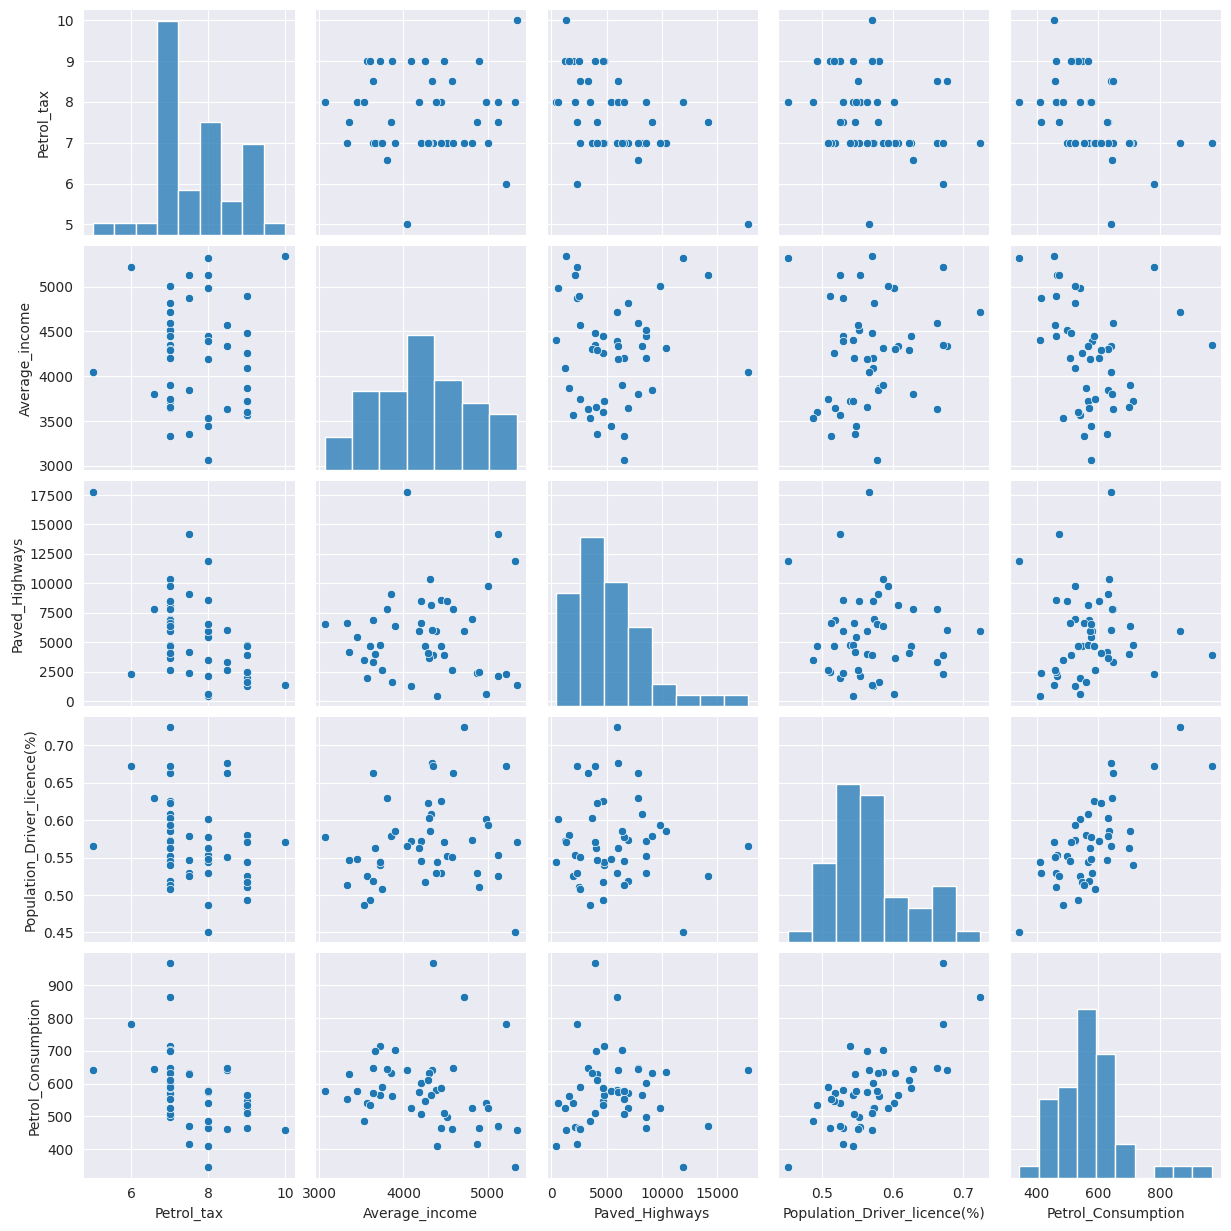

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.tree import DecisionTreeRegressor

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

/home/alexander/DataspellProjects/workspace/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


[Text(0.48295454545454547, 0.9375, 'X[1] <= 4140.0\nmse = 300944.729\nsamples = 38\nvalue = 4227.184'),
 Text(0.21818181818181817, 0.8125, 'X[1] <= 3687.0\nmse = 46431.484\nsamples = 16\nvalue = 3697.125'),
 Text(0.1, 0.6875, 'X[1] <= 3488.0\nmse = 14437.5\nsamples = 8\nvalue = 3521.0'),
 Text(0.05454545454545454, 0.5625, 'X[0] <= 7.75\nmse = 2453.556\nsamples = 3\nvalue = 3379.333'),
 Text(0.03636363636363636, 0.4375, 'X[1] <= 3345.0\nmse = 144.0\nsamples = 2\nvalue = 3345.0'),
 Text(0.01818181818181818, 0.3125, 'mse = 0.0\nsamples = 1\nvalue = 3333.0'),
 Text(0.05454545454545454, 0.3125, 'mse = 0.0\nsamples = 1\nvalue = 3357.0'),
 Text(0.07272727272727272, 0.4375, 'mse = 0.0\nsamples = 1\nvalue = 3448.0'),
 Text(0.14545454545454545, 0.5625, 'X[1] <= 3603.0\nmse = 2361.2\nsamples = 5\nvalue = 3606.0'),
 Text(0.10909090909090909, 0.4375, 'X[3] <= 0.506\nmse = 462.25\nsamples = 2\nvalue = 3549.5'),
 Text(0.09090909090909091, 0.3125, 'mse = 0.0\nsamples = 1\nvalue = 3528.0'),
 Text(0.127

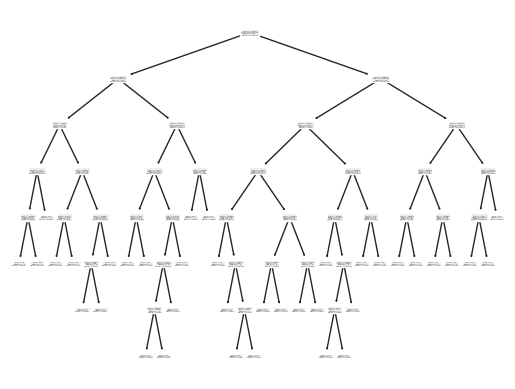

In [31]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)
tree.plot_tree(regressor)

In [32]:
y_pred = regressor.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
res

,Actual,Predicted
0,4391,4399.0
1,3745,3718.0
2,3063,3448.0
3,4897,4870.0
4,4332,4341.0
5,5319,5342.0
6,4318,4207.0
7,4593,4512.0
8,4716,4817.0
9,3601,3528.0


In [33]:
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

MSE: 18476.9
MAE: 84.5


1.9920631802286748

/home/alexander/DataspellProjects/workspace/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[Text(0.48596938775510207, 0.9375, 'X[1] <= 4068.5\nmae = 450.605\nsamples = 38\nvalue = 4232.5'),
 Text(0.20918367346938777, 0.8125, 'X[1] <= 3687.0\nmae = 158.8\nsamples = 15\nvalue = 3656.0'),
 Text(0.11224489795918367, 0.6875, 'X[1] <= 3488.0\nmae = 104.5\nsamples = 8\nvalue = 3549.5'),
 Text(0.061224489795918366, 0.5625, 'X[1] <= 3402.5\nmae = 38.333\nsamples = 3\nvalue = 3357.0'),
 Text(0.04081632653061224, 0.4375, 'X[0] <= 7.25\nmae = 12.0\nsamples = 2\nvalue = 3345.0'),
 Text(0.02040816326530612, 0.3125, 'mae = 0.0\nsamples = 1\nvalue = 3333.0'),
 Text(0.061224489795918366, 0.3125, 'mae = 0.0\nsamples = 1\nvalue = 3357.0'),
 Text(0.08163265306122448, 0.4375, 'mae = 0.0\nsamples = 1\nvalue = 3448.0'),
 Text(0.16326530612244897, 0.5625, 'X[1] <= 3603.0\nmae = 39.4\nsamples = 5\nvalue = 3635.0'),
 Text(0.12244897959183673, 0.4375, 'X[0] <= 8.5\nmae = 21.5\nsamples = 2\nvalue = 3549.5'),
 Text(0.10204081632653061, 0.3125, 'mae = 0.0\nsamples = 1\nvalue = 3528.0'),
 Text(0.142857142

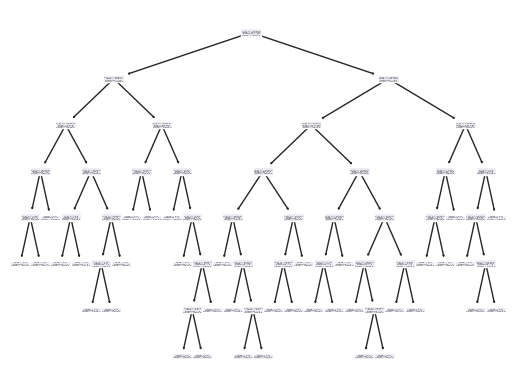

In [34]:
regressor1 = DecisionTreeRegressor(criterion='mae')
regressor1.fit(X_train, y_train)
tree.plot_tree(regressor1)

In [35]:
y_pred1 = regressor1.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred1})
res

,Actual,Predicted
0,4391,4399.0
1,3745,3721.0
2,3063,3357.0
3,4897,4983.0
4,4332,4345.0
5,5319,5215.0
6,4318,4258.0
7,4593,4512.0
8,4716,4817.0
9,3601,3571.0


In [36]:
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(y_test, y_pred1))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred1))
metrics.mean_absolute_error(y_test, y_pred1) / np.average(y) * 100

MSE: 12671.9
MAE: 80.1


1.8883344465836314